In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import shap
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/Users/naveenapaleti/Projects/ShopTrack360/data/customer_features.csv")

In [5]:
# Example rule: Churn if no orders in the last 30 days
df['churn_label'] = (df['Recency'] > 30).astype(int)

In [7]:
X = df.drop(columns=['CustomerID', 'churn_label', 'Country'])  # drop ID & target
y = df['churn_label']

# Optional: encode categorical columns
X = pd.get_dummies(X, drop_first=True)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


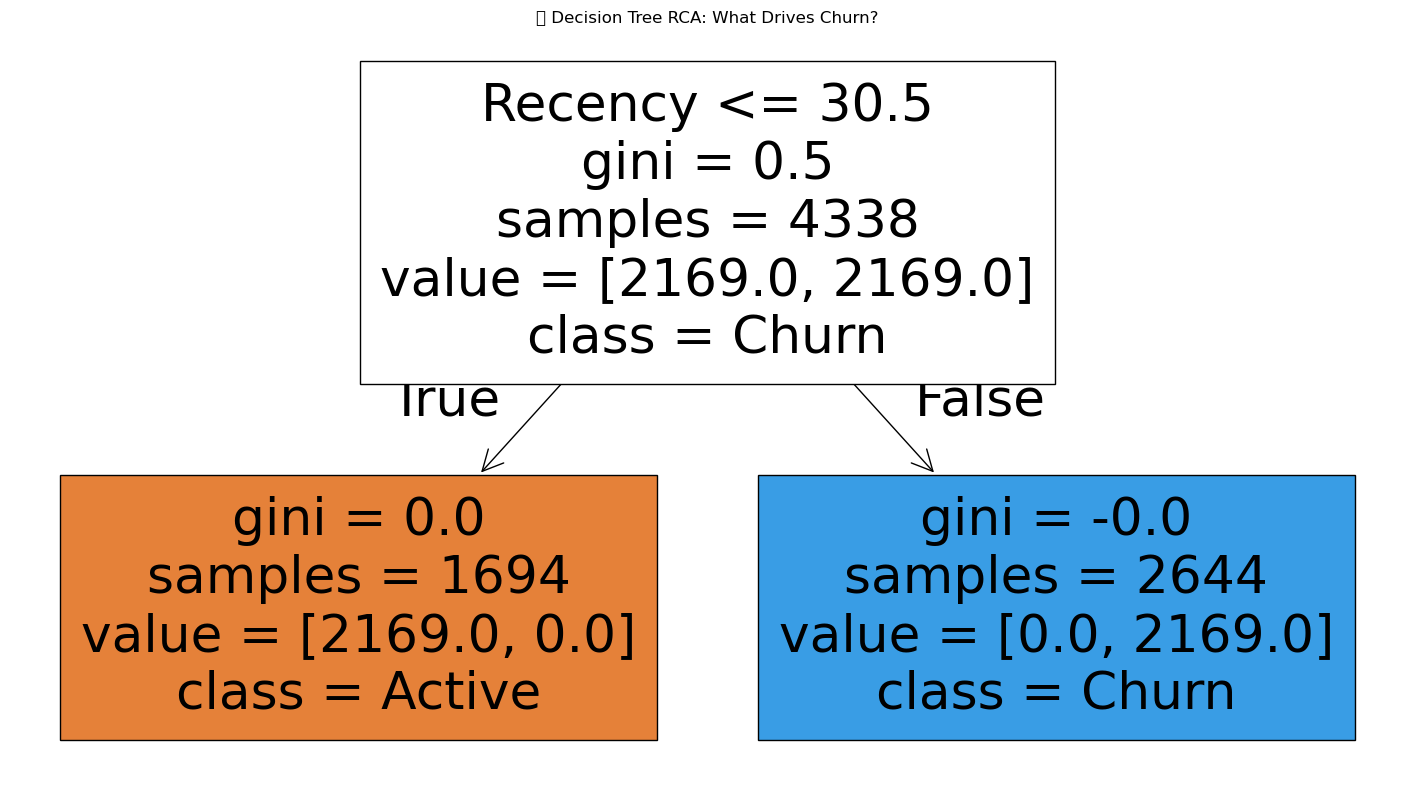

In [9]:
clf = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Active", "Churn"], filled=True)
plt.title("🎯 Decision Tree RCA: What Drives Churn?")
plt.show()

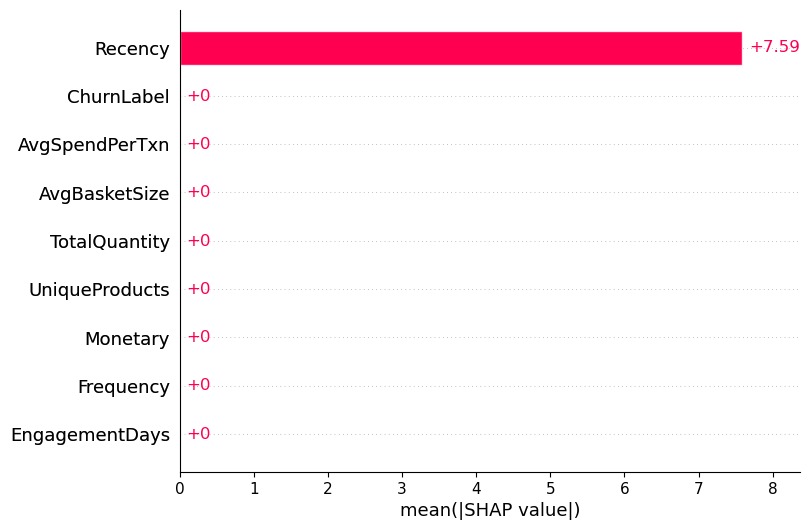

In [11]:
model = XGBClassifier()
model.fit(X, y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

# Global feature importance
shap.plots.bar(shap_values)